# Overview

This notebook is a simpel example showing major modules and functions for data processing. 

For experiment code, please check `src/script` for more info.

In [ ]:
# Navigate to root dir
# cd ..

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.bubble_detection.data.dataset import StockDataset, plot_updowns
from src.bubble_detection.data.utils import get_drawdown_label
from src.bubble_detection.model.utils import plot_predictions

import warnings
warnings.filterwarnings('ignore')

# Get Raw Data and Drawdown

In [3]:
dataset = StockDataset('BTC-USD')

# Load hourly data from Yahoo or local
# df = dataset.get_hist(start='2022-04-20', end='2023-09-20', interval='60m')
# df = pd.read_csv('data/bitcoin_hourly_history.csv', parse_dates=['datetime'], index_col=['datetime'])


# Load daily data
df = dataset.get_hist(start='2014-10-07', end='2019-04-06', interval='1d')

=== LOAD BTC-USD data from 2014-10-07 to 2019-04-06 by 1d ===


In [4]:
df

,open,high,low,close,volume,diff,return,vol
date,,,,,,,,
2014-10-17,382.756012,385.477997,375.389008,383.757996,13600700,1.201996,0.003142,0.027477
2014-10-18,383.976013,395.157990,378.971008,391.441986,11416800,7.683990,0.020023,0.024581
2014-10-19,391.253998,393.938995,386.457001,389.545990,5914570,-1.895996,-0.004844,0.023501
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,-6.700989,-0.017202,0.024210
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,3.630005,0.009482,0.024189
...,...,...,...,...,...,...,...,...
2019-04-01,4105.362305,4164.953125,4096.901367,4158.183105,10157794171,52.778809,0.012856,0.010806
2019-04-02,4156.919434,4905.954590,4155.316895,4879.877930,21315047816,721.694824,0.173560,0.054889
2019-04-03,4879.958008,5307.003418,4876.621094,4973.021973,22899891582,93.144043,0.019087,0.054263


In [5]:
drawdowns = dataset.get_drawdowns(method='dynamic', window_len=30)
drawdowns

,peak_day,peak_frequency,peak_price,valley_day,valley_price,drop_percent,duration
0,2015-01-26,0.507273,273.472992,2015-02-05,217.110992,0.206097,10
1,2015-03-11,1.000000,296.378998,2015-04-14,219.158997,0.260545,34
2,2015-05-08,0.587273,243.863007,2015-06-07,222.880997,0.086040,30
3,2015-07-12,0.996364,310.867004,2015-08-24,210.494995,0.322878,43
4,2015-11-04,0.538182,411.562988,2015-11-11,311.084015,0.244140,7
5,2015-12-15,0.992727,465.321014,2016-01-15,364.330994,0.217033,31
6,2016-02-21,0.721818,438.798004,2016-03-05,400.570007,0.087120,13
7,2016-04-26,0.661818,466.088989,2016-05-19,438.714996,0.058731,23
8,2016-06-16,1.000000,766.307983,2016-08-02,547.465027,0.285581,47
9,2016-09-08,0.501818,626.315979,2016-09-22,596.297974,0.047928,14


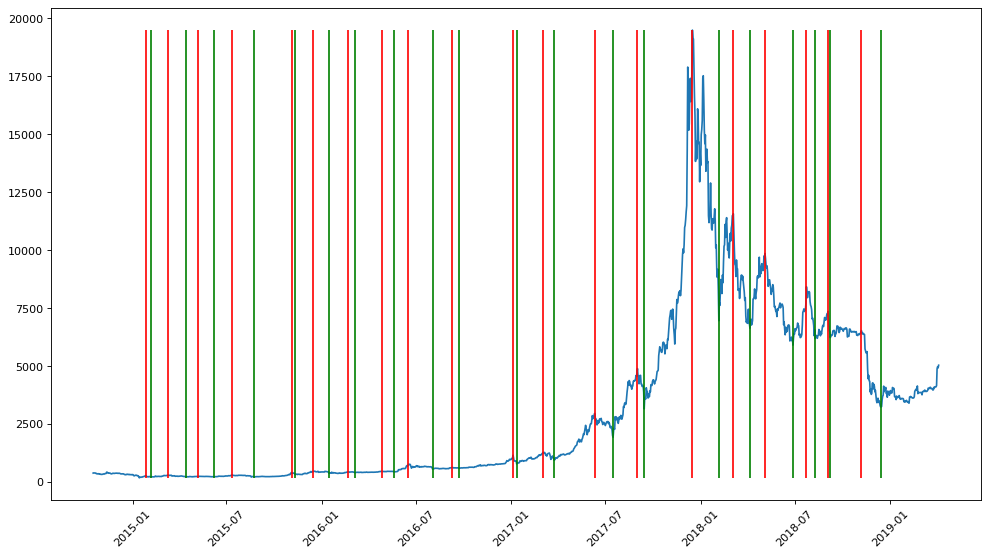

In [6]:
# Red line represents for peak, green line represents for valley
plot_updowns(df, peaks=drawdowns['peak_day'], valleys=drawdowns['valley_day'])

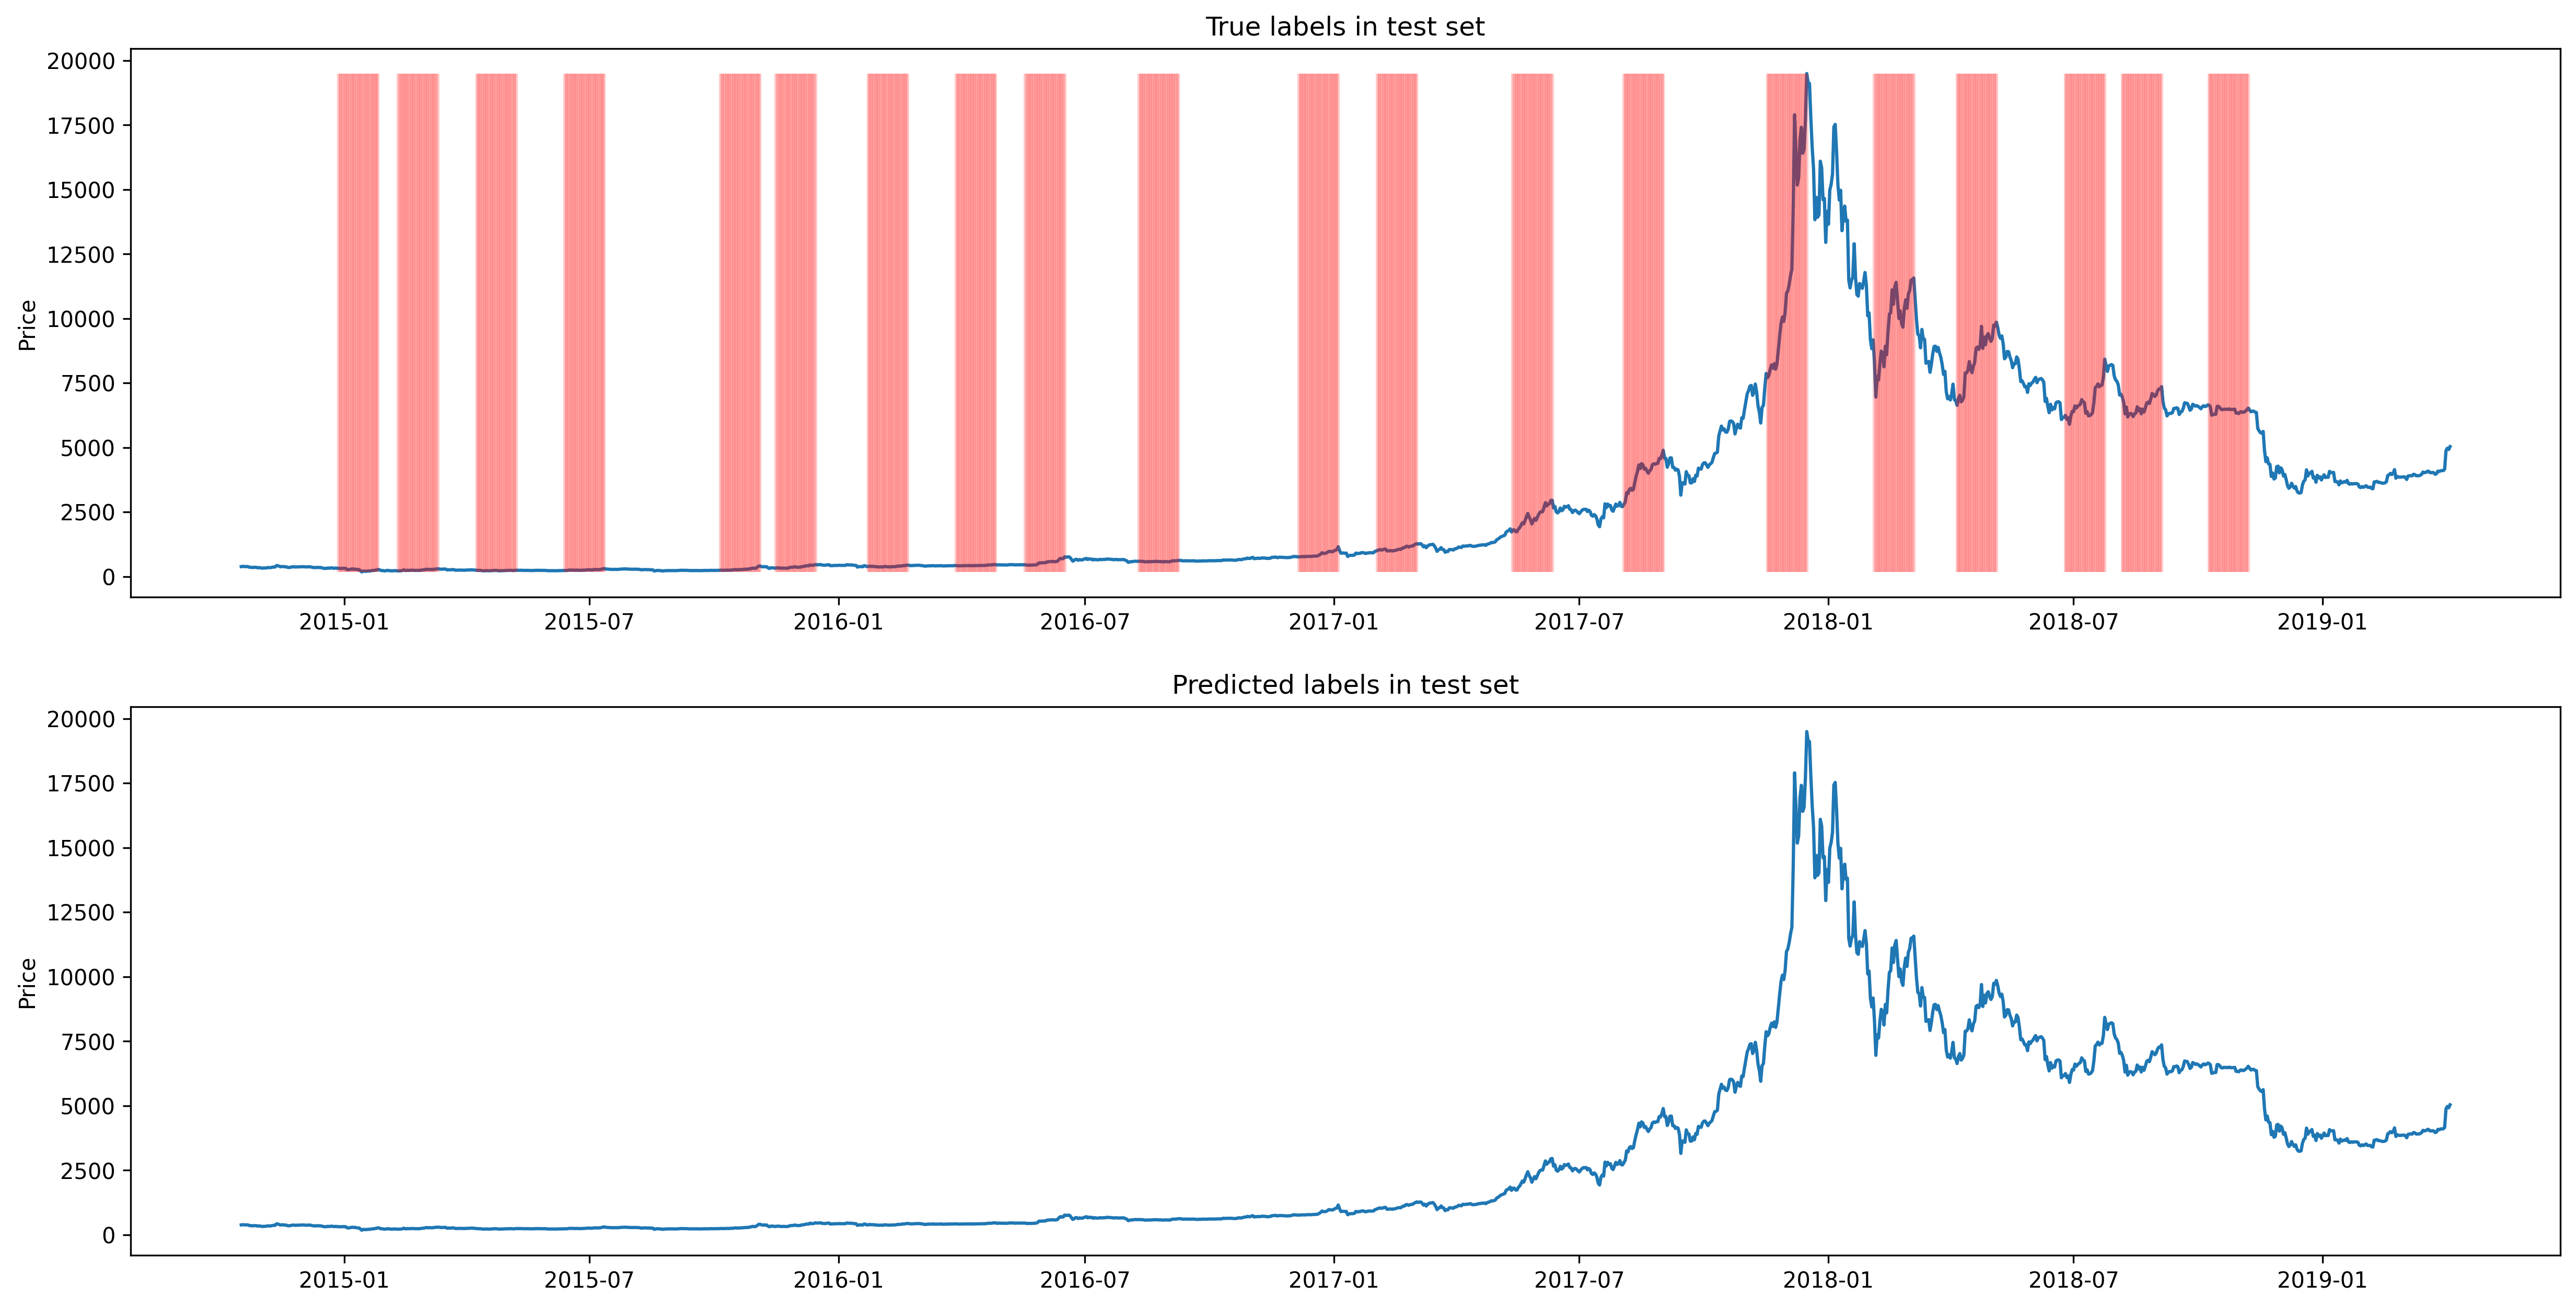

In [7]:
label = get_drawdown_label(df, drawdowns, forecast_len=30)
_ = plot_predictions(df, label)